<a href="https://colab.research.google.com/github/Dana-Afazeli/Yektanet-Data-science/blob/main/Yektanet_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yektanet Data analysis task 1
In this task we analyze a data sample gathered from an online shop in a 4 days span. 


## problem description
provided data has the following columns:


*   Time of event
*   Type of event
*   Product ID
*   Category ID
*   Brand
*   Price
*   User ID



## objective
We hope to be answer the following questions:


1.   What is the field of work of this shop? [answer](#answer1)
2.   Assuming that this shop wants to run a 1 hours sale for 10 goods, which goods do you suggest for the sale? What is the best time interval for this sale? [answer](#answer2)
3.   What are the "Luxury" goods of this shop?
4.   What company has better branding?



In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

Load the data and get a feeling of how it looks like

In [6]:
df = pd.read_csv("./drive/MyDrive/datasets/yektanet_tasks/task1_dataset.csv", index_col = False)
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id
0,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717
1,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250
2,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854
3,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217
4,2019-10-01 00:00:05 UTC,view,1480613,2053013561092866779,computers.desktop,pulser,908.62,512742880


get some feeling about the columns and attributes

In [7]:
# just a util descriptive function
def my_describe(df):
  print(df.describe(),"\n\n")
  print(df.info())
  N = df.shape[0]
  print("\n\nnumber and percentage of NaN values in each column:\n")
  for col in df.columns:
    nulls = df[col].isnull().sum()
    print(col, ":" ,nulls, ",", round((nulls/N) * 100, 2))

my_describe(df)

         product_id   category_id         price       user_id
count  3.820450e+06  3.820450e+06  3.820450e+06  3.820450e+06
mean   7.303264e+06  2.056139e+18  3.365825e+02  5.315324e+08
std    1.001141e+07  1.595066e+16  3.859731e+02  1.697407e+07
min    1.001588e+06  2.053014e+18  0.000000e+00  1.842654e+08
25%    1.004872e+06  2.053014e+18  8.984000e+01  5.155822e+08
50%    2.900022e+06  2.053014e+18  1.904500e+02  5.272590e+08
75%    8.500086e+06  2.053014e+18  4.247200e+02  5.485322e+08
max    5.490001e+07  2.172371e+18  2.574070e+03  5.568893e+08 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3820450 entries, 0 to 3820449
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
dtypes: float64(1), int64(3), object(4)
memory 

First off, the lowest price is 0! we will take care of this later when we visualize the numerical data.

Second, the NaN values. since the percentage of Na entries in the data is not that large (less than say 30%), we wont delete any column. we also wont delete any row with Na entries unless both category code and brand are Na in which case the event does not really give us any info.

In [25]:
# drop Na values
df_no_Na = df.dropna(subset = ['category_code', 'brand'], how='all')
my_describe(df_no_Na)


         product_id   category_id         price       user_id
count  3.718768e+06  3.718768e+06  3.718768e+06  3.718768e+06
mean   6.778296e+06  2.055998e+18  3.411929e+02  5.315412e+08
std    9.453872e+06  1.576626e+16  3.873056e+02  1.697547e+07
min    1.001588e+06  2.053014e+18  0.000000e+00  1.842654e+08
25%    1.004870e+06  2.053014e+18  9.241000e+01  5.155838e+08
50%    2.701995e+06  2.053014e+18  1.963600e+02  5.272752e+08
75%    6.500922e+06  2.053014e+18  4.373300e+02  5.485498e+08
max    5.490001e+07  2.172371e+18  2.574070e+03  5.568893e+08 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3718768 entries, 0 to 3820449
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
dtypes: float64(1), int64(3), object(4)
memory 

<a name="answer1"></a>
## Answer 1
Now that we have a clean data, lest tackle the first question. we start analysing our dataset's entries. We start by seeing the different values of categorical columns:



there are 124 categories and some of them are: ['appliances.environment.water_heater' 'furniture.living_room.sofa'
 'computers.notebook' 'electronics.smartphone' 'computers.desktop' nan
 'apparel.shoes.keds' 'appliances.kitchen.microwave'
 'furniture.bedroom.bed' 'electronics.video.tv']


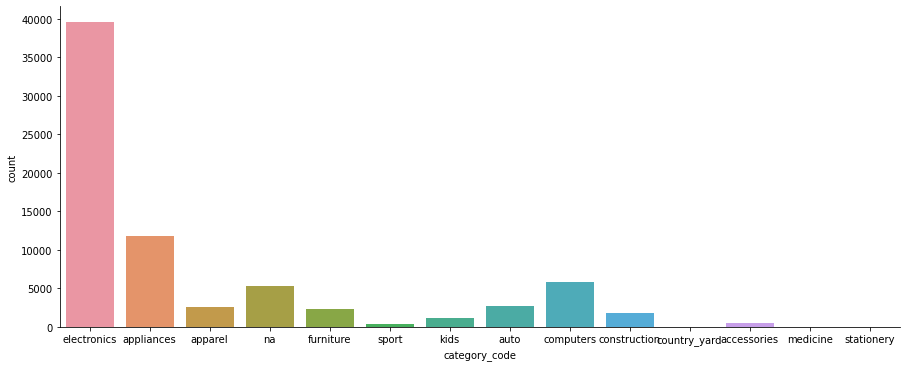

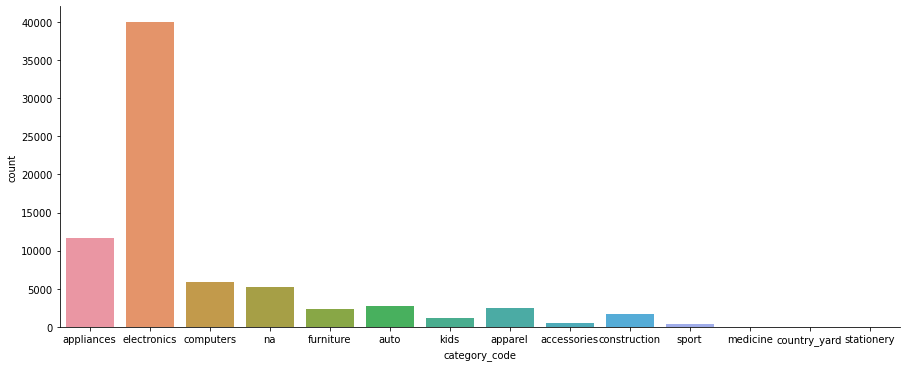

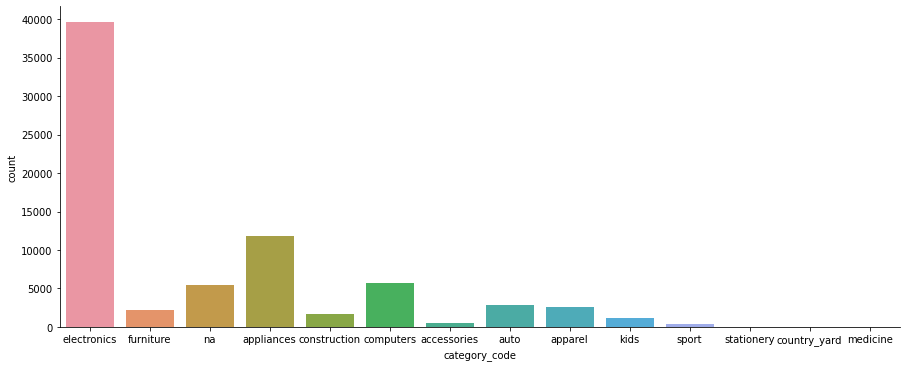

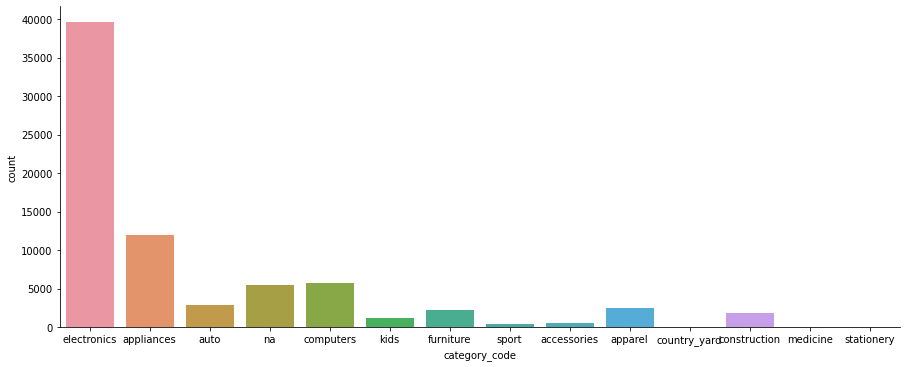

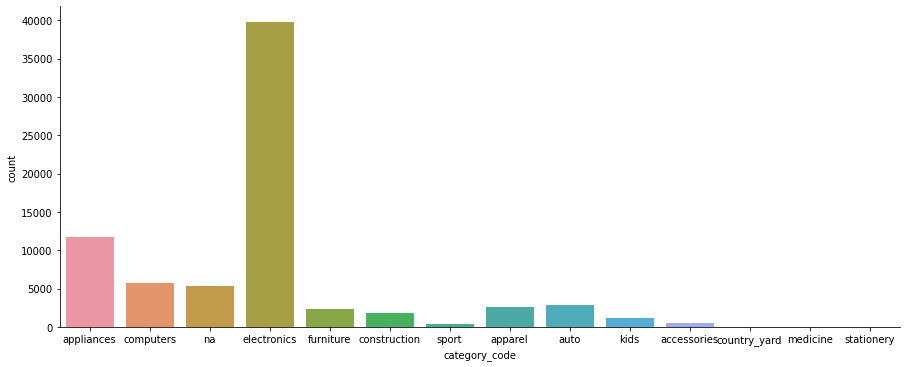

In [18]:
### categorical analysis ###
categories = df_no_Na.category_code.unique()
print("\n\nthere are {0} categories and some of them are:".format(len(categories)), categories[:10])

# clean and plot a sample data. for more robustness we repeatej
REP = 5
for i in range(REP):
  # take a sample of the main data to modify
  category_df = df_no_Na.copy().sample(frac = .1 / REP, random_state = np.random.RandomState()).copy()

  # clean the category column with: appliancees, furniture, computers and ...
  def clean_category(row):
    cat = str(row.category_code)
    cat = cat[:cat.find('.')]
    return cat

  # clean and plot the data
  category_df['category_code'] = category_df.apply(lambda row: clean_category(row), axis=1)
  sns.catplot(x = "category_code", kind="count", data=category_df, aspect = 2.5)


Here we can answer our first question.
As its supported by the plot above, this shop sells different types of product. from furniture to electronics to sport accessories to even medicine! so its really something like amazon or digikala. But as one can verify, the majority of traffic on this website is around ***electronic products***. So if we were to guess a field of work for this shop, that would definitely be ***electronic products***.

<a name="answer2"></a>
## Answer 2
Now lets approach the second question. To asnwer this question we essentially need to know when and what products are "bought" more in order to maximize the expected price of the product that we want to put on sale.
So all we have to do, is to plot the "buy" actions (maybe add "cart" actions as well) with respect to the time of the corresponding events:

         product_id   category_id         price       user_id
count  6.996100e+04  6.996100e+04  69961.000000  6.996100e+04
mean   3.762717e+06  2.054532e+18    361.960080  5.333920e+08
std    6.108940e+06  1.220198e+16    371.055166  1.651749e+07
min    1.001588e+06  2.053014e+18      0.880000  4.337542e+08
25%    1.004767e+06  2.053014e+18    130.250000  5.163493e+08
50%    1.005105e+06  2.053014e+18    230.610000  5.324968e+08
75%    4.501774e+06  2.053014e+18    462.660000  5.504047e+08
max    5.300001e+07  2.172371e+18   2574.040000  5.568886e+08 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69961 entries, 0 to 69960
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   event_time     69961 non-null  object 
 1   event_type     69961 non-null  object 
 2   product_id     69961 non-null  int64  
 3   category_id    69961 non-null  int64  
 4   category_code  67027 non-null  object 
 5   brand          677

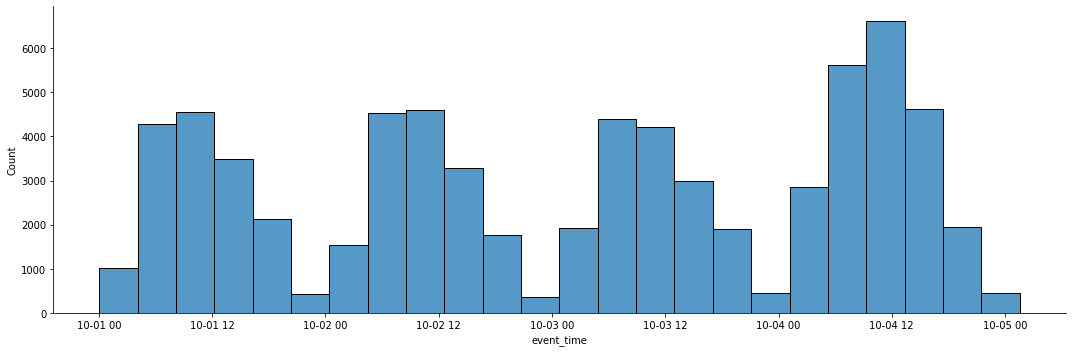

In [55]:
# plotting "purchase" with respect to time of transactions
dateformat = '%Y-%m-%d %H:%M:%S UTC'
buy_df = df_no_Na.loc[df_no_Na['event_type'] == 'purchase'].reset_index( drop = True)
my_describe(buy_df)

# clean event_time column
def clean_event_time(row):
  return datetime.strptime(row.event_time, dateformat)

buy_df['event_time'] = buy_df.apply(lambda row: clean_event_time(row), axis = 1)
sns.displot(buy_df, x = 'event_time', aspect = 3, bins = 24)

Now lets see what does this mean. Before anything, we knew that the data is for a 4 day span. we can confirm that info by this plot; the span is from 2019-10-01 to 2019-10-04 which is from tuesday to friday. Now we can see that the first 3 days have relatively equal number of sells in different hours of the day. But a peak can be found in friday, coincidence? I think not! Assuming that this data is for a persian shop, we can explain this modality by the fact that people tend to go shopping on their day offs! Also, obviously all this peaks at noon, no matter its friday or any other day. Knowing this, for the day and time span we can say ***Friday noon*** is a good option. now lets find out wich products are sold more frequently in this time. My intuition tells me that because of the major difference between electronic sells and other categories sells, we should put electronics on sale. But lets see if the data thinks the same way:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


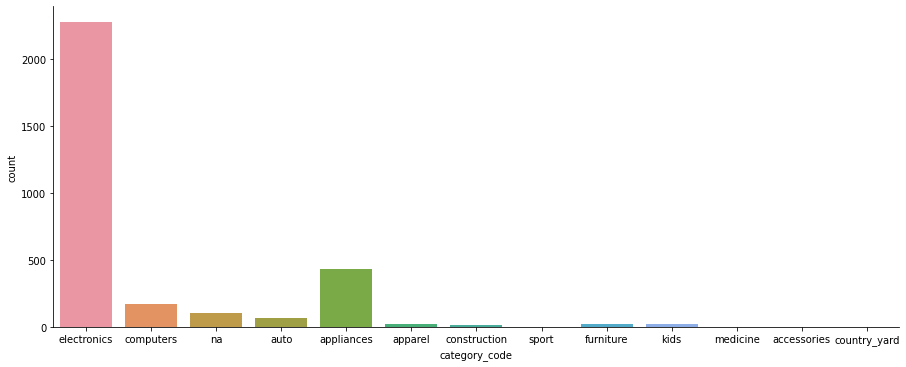

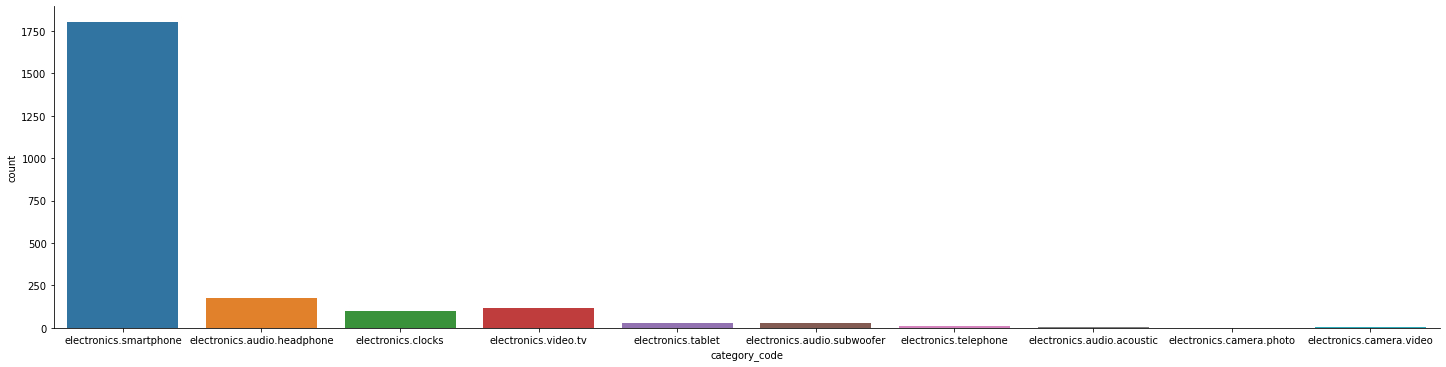

In [85]:
# see what products are sold better in friday noon
friday_events_df = buy_df[buy_df.event_time > datetime.strptime('2019-10-04 11:00:00 UTC', dateformat)]
friday_events_df = friday_events_df[buy_df.event_time < datetime.strptime('2019-10-04 13:00:00 UTC', dateformat)]

friday_events_df_cleansed = friday_events_df.copy()
friday_events_df_cleansed['category_code'] = friday_events_df.apply(lambda row: clean_category(row), axis = 1)
sns.catplot(x = "category_code", kind="count", data=friday_events_df_cleansed, aspect = 2.5)

# see what are the electronics that are sold more often
friday_electronics_df = friday_events_df[friday_events_df.category_code.notna()]
friday_electronics_df = friday_electronics_df[friday_electronics_df.category_code.str.startswith('electronics')]

sns.catplot(x = "category_code", kind="count", data=friday_electronics_df, aspect = 4)

As its apparent from the charts above, not only electronics are the most sold items in this span, but we can also say that the majority of the electronics are smartphones! maybe we can even better our answer on the first question; the majority of traffic of the website are the smartphones! So the products to put a sale on are definitely ***smartphones*** but lets go one step further and plot our smartphones with respect to the brand of them:

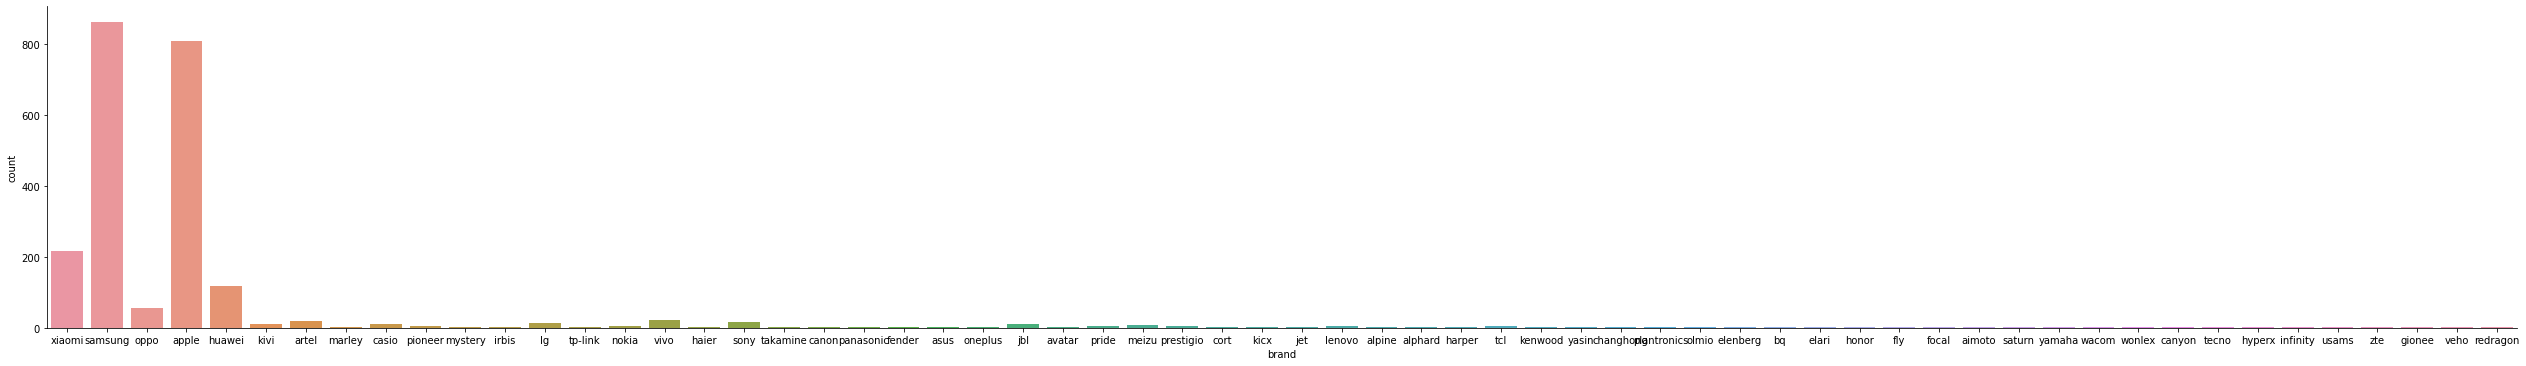

In [94]:
sns.catplot(x = 'brand', data=friday_electronics_df, aspect = 7, kind='count')

Therefore ***samsung, apple, xiaomi and huawei*** are the most sells and are therefore better candidates for sale.